# <CENTER style="background-color:silver">FAKE NEWS DETECTION ML-NLP PROJECT </CENTER>

# <center><img src = "https://engineering.ucdavis.edu/sites/g/files/dgvnsk2151/files/styles/sf_landscape_16x9/public/media/images/413f7eda-5991-660f-a0e9-36d5a7ee2754.png"  width='700'></center>

# ROADMAP :
- Important Libraries/ Modules
- Data Load
- Data Preprocessing:
  - Feature Engineering
  - EDA
      - Outliers Detection/Remove
      - ML + DL:- Stopwords,Stem
- Model Creation
- Multiple Model Creation
- Compare Multiple Model
- Best Model
- Model Save
- Predict test
- Website Template
- Real + Fake
-  Github

# PROJECT OBJECTIVE :

This Project aims to provide you a better understanding between fake news vs real news in order to keep ourselves safe from misleading and false information constantly forwarding in the world.
It helps to find the real news out of the fake news.
Here '0' means 'FAKE News' and '1' means 'REAL News'.

# PROJECT OVERVIEW/OUTLINES :

- Importing necessary libraries
- Dataset loading
- Exploratory Data Analysis:
   * treating missing values
   * duplicate values checking
   * info checking
   * visualization of count of fake news vs real news
- Text preprocessing:
   * removing special characters, white spaces
   * stopwords removal, porter stemming
- Word cloud formation
- Creation and transformation of variables into vectors through Tfidf vectorizer
- building multiple models to check accuracy score, type1 error, type2 error, confusion matrix and classification report
- Machine learning models:
   * linear regression
   * decision tree classifier
   * random forest classifier
   * support vector machine
   * k-nearest neighbor
   * gradient boosting classifier
   * adaboost
   * xgboost classifier
- Saving the best model
- deployment of the website
     

# IMPORTING NECESSARY LIBRARIES :

In [9]:
import numpy as np 
import pandas as pd 
import re ,os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time
from sklearn.metrics import confusion_matrix, classification_report
print ('all libraries imported succesfully !!')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


all libraries imported succesfully !!


In [10]:
# pip install plyer

In [11]:
# pip install xgboost

# import xgboost as xgb

In [12]:
# pip install wordcloud

# from wordcloud import WordCloud

In [13]:
# import time

In [14]:
from plyer import notification

# if __name__=="__main__":
# 		notification.notify(
# 			title = "RUNNING CELL",
# 			message=" CELL EXECUTED SUCCESSFULLY!!" ,	
# 			timeout=3)

# LOADING DATASET FILE :

In [16]:
df = pd.read_csv('C:/Users/pc/Desktop/KAGGLE DATA/Fake_Data.csv')
print ('data loaded successfully !!')

data loaded successfully !!


# EXPLORATORY DATA ANALYSIS :

### SHAPE OF DATASET :

In [19]:
df.shape

(72134, 4)

### TOP ROWS :

In [21]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### BOTTOM ROWS :

In [23]:
df.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


### INFO. OF DATA :

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


### NULL VALUES CHECKING :

In [27]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

### DROPPING UNNECESSARY COLUMN :

In [29]:
df = df.drop('Unnamed: 0',axis=1)      # DROPPING UNNECESSARY COLUMN
print("'Unnamed: 0' column is removed ")

'Unnamed: 0' column is removed 


### DROPPING NULL ROWS :

In [31]:
df=df.dropna()                 # DROPPING MISSING VALUES
print ('missing values removed all over the data !!')

missing values removed all over the data !!


In [32]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [33]:
df.shape

(71537, 3)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [35]:
# what is title
df.iloc[0,0]

# news title

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [36]:
# what is text
df.iloc[0,1][0:300]

# detailed news

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about t'

In [37]:
# what is label
df.iloc[0,2]

# 0-fake news
# 1-real news

1

### DUPLICATE DATA CHECKING :

In [39]:
df[['title','text']].duplicated().sum()

8416

In [40]:
df[['title','text']].duplicated().value_counts()

False    63121
True      8416
Name: count, dtype: int64

In [41]:
df['title'].duplicated().value_counts()

title
False    62308
True      9229
Name: count, dtype: int64

In [42]:
df['text'].duplicated().value_counts()

text
False    62200
True      9337
Name: count, dtype: int64

### DROPPING DUPLICATES :

In [44]:
df1 = df.drop_duplicates(['title','text'],keep='first')              # dropping common duplicates from both columns
print('common duplicates dropped from data !!')

common duplicates dropped from data !!


In [45]:
df1[['title','text']].duplicated().value_counts()

False    63121
Name: count, dtype: int64

In [46]:
df1['title'].duplicated().value_counts()

title
False    62308
True       813
Name: count, dtype: int64

In [47]:
df1['text'].duplicated().value_counts()

text
False    62200
True       921
Name: count, dtype: int64

In [48]:
df2 = df1.drop_duplicates('title',keep = 'first')            # dropping duplicates from title column
print('duplicates dropped from title column !!')

duplicates dropped from title column !!


In [49]:
df2['title'].nunique()

62308

In [50]:
df3 = df2.drop_duplicates('text',keep='first')              # dropping duplicates from text column 
print('duplicates dropped from text column !!')

duplicates dropped from text column !!


In [51]:
df3.nunique()

title    61393
text     61393
label        2
dtype: int64

In [52]:
df3['title'].nunique()

61393

In [53]:
df3['text'].nunique()

61393

In [54]:
df3.shape

(61393, 3)

# DATA VISUALIZATION :

In [56]:
# we will continue with df3 after completing all cleaning

### COLUMN NAMES :

In [58]:
df3.columns

Index(['title', 'text', 'label'], dtype='object')

In [59]:
df3.head(3)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0


### VISUALIZATION OF TOTAL NUMBER OF FAKE AND REAL NEWS :

In [61]:
ds = df3['label'].value_counts().reset_index()
ds

,label,count
0,0,34237
1,1,27156


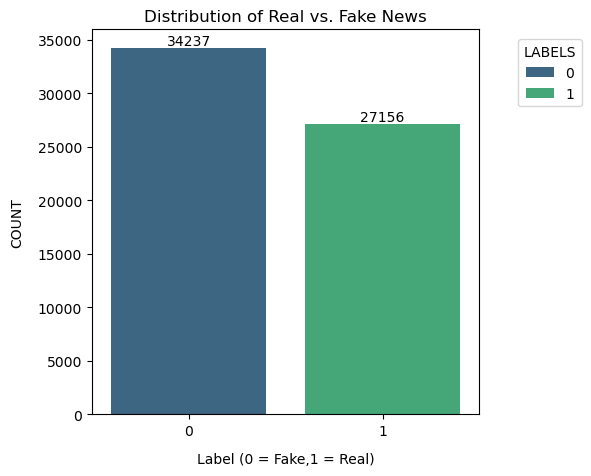

In [62]:
# Plotting the value counts of the 'label' column

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='label', y='count', data=ds, palette='viridis' , hue='label' )
plt.title('Distribution of Real vs. Fake News')
plt.xlabel('Label (0 = Fake,1 = Real)',labelpad=10)
plt.ylabel('COUNT',labelpad=10)
plt.xticks(rotation=0)
plt.legend(title='LABELS',loc=(1.1,0.8))
for i,j in enumerate(ax.containers):
    plt.bar_label(j)
plt.show()


 # TEXT PRE-PROCESSING :

In [64]:
def pre_process(title):
    title = re.sub(r'[^a-zA-Z]',' ',title)    # REMOVING SPECIAL CHARACTERS
    title = re.sub(r'\s+',' ',title)          # REMOVING WHITE SPACES
    title = title.lower()                     # LOWERING ALL CHARACTERS
    return title
    

In [65]:
df3['new_title'] = df3['title'].apply(pre_process)         # MAKING NEW COLUMN
df3['new_title'] 

C:\Users\pc\AppData\Local\Temp\ipykernel_36804\3218060393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new_title'] = df3['title'].apply(pre_process)         # MAKING NEW COLUMN


0        law enforcement on high alert following threat...
2        unbelievable obama s attorney general says mos...
3        bobby jindal raised hindu uses story of christ...
4        satan russia unvelis an image of its terrifyin...
5        about time christian group sues amazon and spl...
                               ...                        
72127    wikileaks email shows clinton foundation funds...
72129    russians steal research on trump in hack of u ...
72130     watch giuliani demands that democrats apologi...
72131    migrants refuse to leave train at refugee camp...
72132    trump tussle gives unpopular mexican leader mu...
Name: new_title, Length: 61393, dtype: object

In [66]:
ps = PorterStemmer()
def stemming(text):
    text = text.split()                                                       # SPLITTING THE STRING
    stop_words = stopwords.words('english')                                   # REMOVING STOPWORDS
    text = [ps.stem(word) for word in text if word not in stop_words]         # APPLYING PORTER STEMMING(CONVERTING INTO ROOT WORDS)
    text = ' '.join(text)
    return text


In [67]:
df3['new_title'] = df3['new_title'].apply(stemming) 

C:\Users\pc\AppData\Local\Temp\ipykernel_36804\3536242739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new_title'] = df3['new_title'].apply(stemming)


### DROPPING UNNECESSARY COLUMNS :

In [69]:
df3 = df3.drop(['title','text'],axis=1)        # DROPPING UNNECESSARY COLUMNS
print('title and text columns are removed because of no further use !!')

title and text columns are removed because of no further use !!


### RESETTING THE INDEX :

In [71]:
df3.reset_index(drop=True,inplace=True)

In [72]:
df3.head(2)

,label,new_title
0,1,law enforc high alert follow threat cop white ...
1,1,unbeliev obama attorney gener say charlott rio...


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      61393 non-null  int64 
 1   new_title  61393 non-null  object
dtypes: int64(1), object(1)
memory usage: 959.4+ KB


In [74]:
# what is label column 
df3.iloc[0,0]

# 0-fake news
# 1-real news

1

In [75]:
# what is new_title
df3.iloc[0,1]

# news title

'law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video'

# CREATING WORDCLOUD OF NEW_TITLE COLUMN:

In [77]:
all_title_words = ''.join(df3['new_title'])

In [78]:
all_title_words[:450]

'law enforc high alert follow threat cop white blacklivesmatt fyf terrorist videounbeliev obama attorney gener say charlott rioter peac protest home state north carolina videobobbi jindal rais hindu use stori christian convers woo evangel potenti bidsatan russia unv imag terrifi new supernuk western world take notictime christian group sue amazon splc design hate groupdr ben carson target ir never audit spoke nation prayer breakfasthous intel chai'

### INSTALLING AND IMPORTING WORDCLOUD :

In [80]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [81]:
from wordcloud import WordCloud

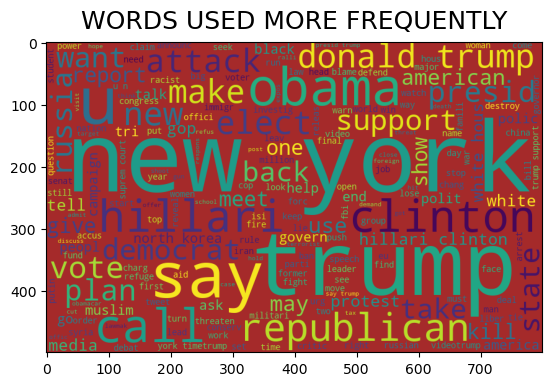

In [82]:
plt.imshow(WordCloud(background_color='brown',height=500,width=800).generate(all_title_words))
plt.title('WORDS USED MORE FREQUENTLY',fontsize=18,pad=10)
plt.show()

#  CREATING AND TRANSFORMING VARIABLES INTO VECTORS :

### x and y creation :

In [85]:
x = df3['new_title']
x

0        law enforc high alert follow threat cop white ...
1        unbeliev obama attorney gener say charlott rio...
2        bobbi jindal rais hindu use stori christian co...
3        satan russia unv imag terrifi new supernuk wes...
4        time christian group sue amazon splc design ha...
                               ...                        
61388    wikileak email show clinton foundat fund use l...
61389    russian steal research trump hack u democrat p...
61390    watch giuliani demand democrat apolog trump ra...
61391         migrant refus leav train refuge camp hungari
61392    trump tussl give unpopular mexican leader much...
Name: new_title, Length: 61393, dtype: object

In [86]:
y = df3['label']
y

0        1
1        1
2        0
3        1
4        1
        ..
61388    1
61389    0
61390    1
61391    0
61392    0
Name: label, Length: 61393, dtype: int64

In [87]:
print(f'x-shape:{x.shape} \n y-shape:{y.shape} ')

x-shape:(61393,) 
 y-shape:(61393,) 


### converting text into binary through vectorization :

In [89]:
vector = TfidfVectorizer()                       #  term frequency-inverse document frequency vectorizer
vector = vector.fit(x)
x = vector.transform(x)


In [90]:
print('x-shape after vectorization is :',x.shape)

x-shape after vectorization is : (61393, 19374)


### Dividing the data into training and testing:

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,stratify = y,random_state=20)

In [93]:
print(f'x_train-shape:{x_train.shape} \n x_test-shape:{x_test.shape} ')

x_train-shape:(49114, 19374) 
 x_test-shape:(12279, 19374) 


In [94]:
print(f'y_train-shape:{y_train.shape} \n y_test-shape:{y_test.shape} ')

y_train-shape:(49114,) 
 y_test-shape:(12279,) 


# MULTIPLE MODELS CREATION :

##  model prediction using logistic regression :

In [97]:
start_time = time.time()

lr_model = LogisticRegression()
lr_model = lr_model.fit(x_train,y_train)
lr_model

end_time = time.time()
total_time_lr = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_lr,2)}')


notification.notify(
			title = "CELL EXECUTED",
			message=" Lr_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 0.66


In [98]:
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [99]:
print('Actual Score=',round((lr_model.score(x_train,y_train)*100),2),'%')

Actual Score= 91.66 %


In [100]:
print('Actual Score=',round((lr_model.score(x_test,y_test)*100),2),'%')

Actual Score= 88.83 %


In [101]:
print (confusion_matrix(y_test,y_pred_lr))

[[6163  685]
 [ 687 4744]]


In [102]:
print (classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6848
           1       0.87      0.87      0.87      5431

    accuracy                           0.89     12279
   macro avg       0.89      0.89      0.89     12279
weighted avg       0.89      0.89      0.89     12279



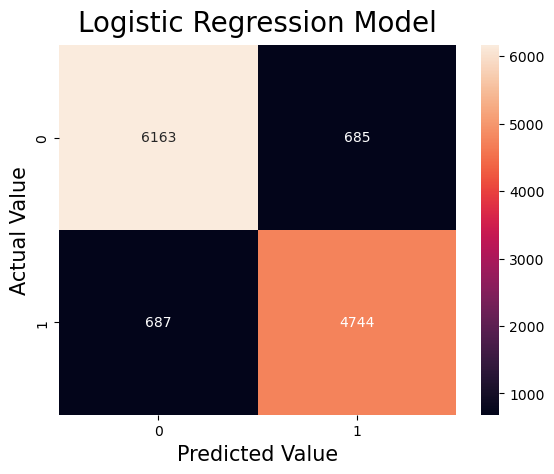

In [103]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='0g')
plt.title('Logistic Regression Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

## Model prediction using DecisionTreeClassifier :

In [105]:
start_time = time.time()

dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train,y_train)
dt_model

end_time = time.time()
total_time_dt = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_dt,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" DT_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 26.27


In [106]:
y_pred_dt = dt_model.predict(x_test)
y_pred_dt

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [107]:
print('Actual Score=',round((dt_model.score(x_train,y_train)*100),2),'%')

Actual Score= 100.0 %


In [108]:
print('Actual Score=',round((dt_model.score(x_test,y_test)*100),2),'%')

Actual Score= 83.44 %


In [109]:
print (confusion_matrix(y_test,y_pred_dt))

[[5915  933]
 [1101 4330]]


In [110]:
print (classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6848
           1       0.82      0.80      0.81      5431

    accuracy                           0.83     12279
   macro avg       0.83      0.83      0.83     12279
weighted avg       0.83      0.83      0.83     12279



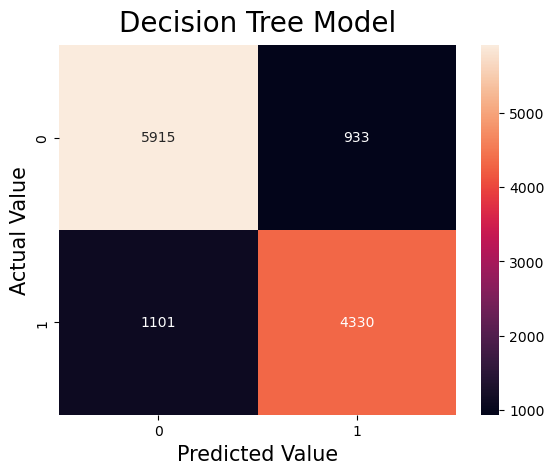

In [111]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='0g')
plt.title('Decision Tree Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

## Prediction using RandomForestClassifier :

In [113]:
start_time = time.time()

rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train,y_train)
rf_model

end_time = time.time()
total_time_rf = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_rf,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" RF_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 285.34


In [114]:
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [115]:
print('Actual Score=',round((rf_model.score(x_train,y_train)*100),2),'%')

Actual Score= 99.99 %


In [116]:
print('Actual Score=',round((rf_model.score(x_test,y_test)*100),2),'%')

Actual Score= 88.48 %


In [117]:
print (confusion_matrix(y_test,y_pred_rf))

[[6150  698]
 [ 716 4715]]


In [118]:
print (classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6848
           1       0.87      0.87      0.87      5431

    accuracy                           0.88     12279
   macro avg       0.88      0.88      0.88     12279
weighted avg       0.88      0.88      0.88     12279



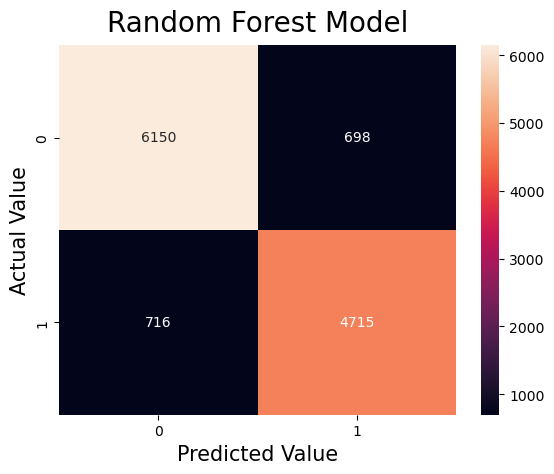

In [119]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='0g')
plt.title('Random Forest Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

## Prediction using K Nearest Neighbors :

In [121]:
start_time = time.time()

knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train,y_train)
knn_model

end_time = time.time()
total_time_knn = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_knn,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" KNN_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 0.02


In [122]:
y_pred_knn = knn_model.predict(x_test)
y_pred_knn

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [123]:
print('Actual Score=',round((knn_model.score(x_train,y_train)*100),2),'%')

Actual Score= 50.75 %


In [124]:
print('Actual Score=',round((knn_model.score(x_test,y_test)*100),2),'%')

Actual Score= 47.72 %


In [125]:
print (confusion_matrix(y_test,y_pred_knn))

[[ 448 6400]
 [  20 5411]]


In [126]:
print (classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.07      0.12      6848
           1       0.46      1.00      0.63      5431

    accuracy                           0.48     12279
   macro avg       0.71      0.53      0.38     12279
weighted avg       0.74      0.48      0.35     12279



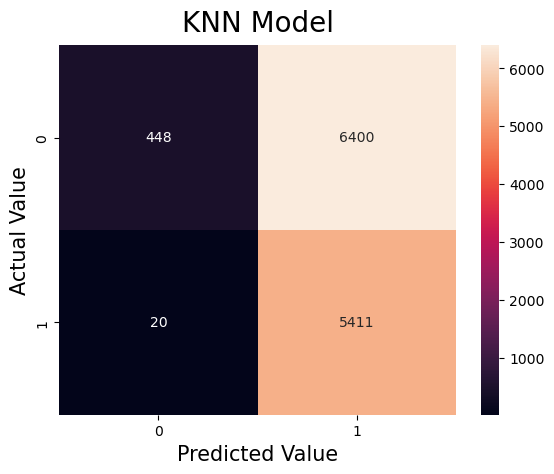

In [127]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='0g')
plt.title('KNN Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

## Prediction using Support Vector Machine :

In [129]:
start_time = time.time()

svc_model = SVC()
svc_model = svc_model.fit(x_train,y_train)
svc_model

end_time = time.time()
total_time_svc = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_svc,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" SVC_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 655.0


In [130]:
y_pred_svc = svc_model.predict(x_test)
y_pred_svc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [131]:
print('Actual Score=',round((svc_model.score(x_train,y_train)*100),2),'%')

Actual Score= 98.03 %


In [132]:
print('Actual Score=',round((svc_model.score(x_test,y_test)*100),2),'%')

Actual Score= 89.54 %


In [133]:
print (confusion_matrix(y_test,y_pred_svc))

[[6180  668]
 [ 616 4815]]


In [134]:
print (classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6848
           1       0.88      0.89      0.88      5431

    accuracy                           0.90     12279
   macro avg       0.89      0.89      0.89     12279
weighted avg       0.90      0.90      0.90     12279



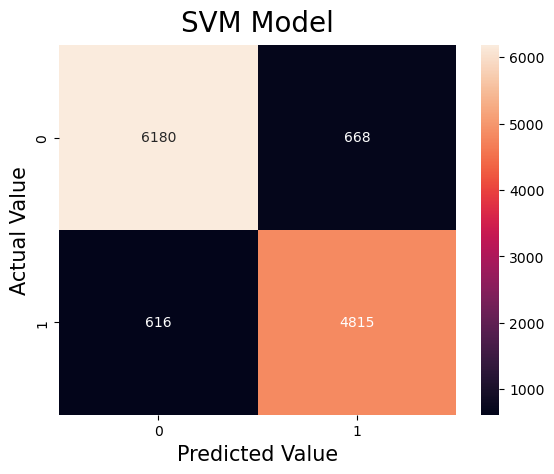

In [135]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True,fmt='0g')
plt.title('SVM Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

### Prediction through Gradient Boosting :

In [137]:
# import time

In [138]:
gb_model = GradientBoostingClassifier(learning_rate=0.5,n_estimators=200,max_depth=5)

In [139]:
atart_time = time.time()

gb_model = gb_model.fit(x_train,y_train)
gb_model

end_time = time.time()
total_time_gb = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_gb,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" GB_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 1315.41


In [140]:
y_pred_gb = gb_model.predict(x_test)
y_pred_gb

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [141]:
print('Actual Score=',round((gb_model.score(x_train,y_train)*100),2),'%')

Actual Score= 93.61 %


In [142]:
print('Actual Score=',round((gb_model.score(x_test,y_test)*100),2),'%')

Actual Score= 87.73 %


In [143]:
print (confusion_matrix(y_test,y_pred_gb))

[[6061  787]
 [ 720 4711]]


In [144]:
print (classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6848
           1       0.86      0.87      0.86      5431

    accuracy                           0.88     12279
   macro avg       0.88      0.88      0.88     12279
weighted avg       0.88      0.88      0.88     12279



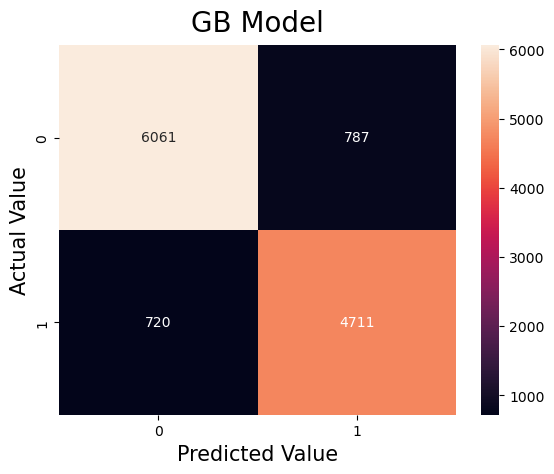

In [145]:
sns.heatmap(confusion_matrix(y_test,y_pred_gb),annot=True,fmt='0g')
plt.title('GB Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

### Prediction using AdaBoost :

In [147]:
# from sklearn.ensemble import AdaBoostClassifier

In [148]:
ad_model = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.6,n_estimators=500)

In [149]:
start_time = time.time()

ad_model = ad_model.fit(x_train,y_train)
ad_model

end_time = time.time()
total_time_ad = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_ad,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" AD_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 685.24


In [150]:
y_pred_ad = ad_model.predict(x_test)
y_pred_ad

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [151]:
print('Actual Score=',round((ad_model.score(x_train,y_train)*100),2),'%')

Actual Score= 75.44 %


In [152]:
print('Actual Score=',round((ad_model.score(x_test,y_test)*100),2),'%')

Actual Score= 75.15 %


In [153]:
print (confusion_matrix(y_test,y_pred_ad))

[[6600  248]
 [2803 2628]]


In [154]:
print (classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      6848
           1       0.91      0.48      0.63      5431

    accuracy                           0.75     12279
   macro avg       0.81      0.72      0.72     12279
weighted avg       0.80      0.75      0.73     12279



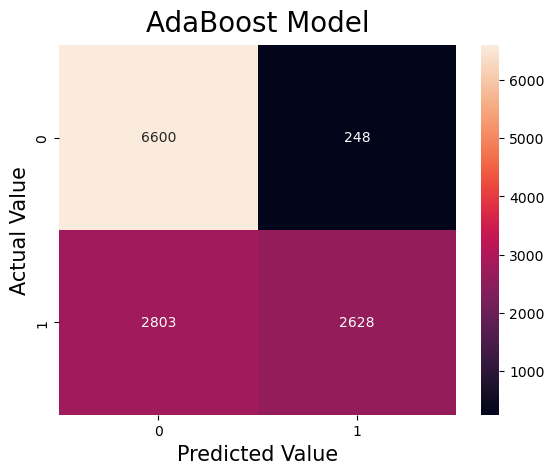

In [155]:
sns.heatmap(confusion_matrix(y_test,y_pred_ad),annot=True,fmt='0g')
plt.title('AdaBoost Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

### Prediction using XGBoostClassifier :

In [157]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [158]:
import xgboost as xgb

In [159]:
xgb_model = xgb.XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.5)

In [160]:
start_time = time.time()

xgb_model = xgb_model.fit(x_train,y_train)
xgb_model

end_time = time.time()
total_time_xgb = end_time - start_time
print(f'total time taken to run the cell is: {round(total_time_xgb,2)}')

notification.notify(
			title = "CELL EXECUTED",
			message=" XGB_model executed Successfully !!" ,	
			timeout=2)

total time taken to run the cell is: 46.12


In [161]:
y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb

array([1, 1, 1, ..., 0, 0, 1])

In [162]:
print('Actual Score=',round((xgb_model.score(x_train,y_train)*100),2),'%')

Actual Score= 94.63 %


In [163]:
print('Actual Score=',round((xgb_model.score(x_test,y_test)*100),2),'%')

Actual Score= 89.02 %


In [164]:
print (confusion_matrix(y_test,y_pred_xgb))

[[6149  699]
 [ 649 4782]]


In [165]:
print (classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6848
           1       0.87      0.88      0.88      5431

    accuracy                           0.89     12279
   macro avg       0.89      0.89      0.89     12279
weighted avg       0.89      0.89      0.89     12279



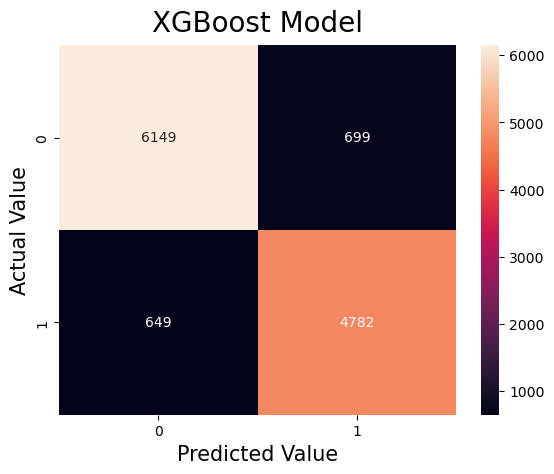

In [166]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='0g')
plt.title('XGBoost Model',fontsize=20,pad=10)
plt.xlabel('Predicted Value',fontsize=15)
plt.ylabel('Actual Value',fontsize=15)
plt.show()

# FUNCTION FOR MULTIPLE MODEL CREATION :

In [168]:
all_model_names = ['Logistic_Regression','DecisionTreeClassifier','RandomForestClassier','K-NearestNeighbors','SupportVectorMachine',
                   'GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
all_model_objects = [lr_model , dt_model , rf_model , knn_model , svc_model , gb_model , ad_model , xgb_model]
all_y_pred = []
all_test_score = []
all_type_1_error = []
all_type_2_error = []


for i,j in zip(all_model_objects,all_model_names):
        all_test_score.append(round(i.score(x_test,y_test)*100,2))
        temp_y_pred = i.predict(x_test)
        all_y_pred.append(temp_y_pred)
        cn_matrix = confusion_matrix(y_test,temp_y_pred).flatten()
        t1,t2 = cn_matrix[1] , cn_matrix[2]
        all_type_1_error.append(t1)
        all_type_2_error.append(t2)
        print(f'Model {j} executed successfully!!', end='\n'*2)

print('All Models executed successfully!!')


notification.notify(
			title = "CELL EXECUTED",
			message=" ALL_models executed Successfully !!" ,	
			timeout=2)
    

Model Logistic_Regression executed successfully!!

Model DecisionTreeClassifier executed successfully!!

Model RandomForestClassier executed successfully!!

Model K-NearestNeighbors executed successfully!!

Model SupportVectorMachine executed successfully!!

Model GradientBoostingClassifier executed successfully!!

Model AdaBoostClassifier executed successfully!!

Model XGBClassifier executed successfully!!

All Models executed successfully!!


In [169]:
total_times = [total_time_lr , total_time_dt , total_time_rf , total_time_knn , total_time_svc , total_time_gb , total_time_ad , total_time_xgb]


# DATAFRAME OF RELEVANT INFORMATION :

In [171]:
models_df = pd.DataFrame({'Model_name':all_model_names,
                        'Test_score(in %)':all_test_score,
                        'Type_1_error':all_type_1_error,
                        'Type_2_error':all_type_2_error,
                        'Time_taken(in sec)':total_times})
models_df

notification.notify(
			title = "CELL EXECUTED",
			message=" DataFrame loaded Successfully !!" ,	
			timeout=2)

In [172]:
models_df = models_df.sort_values(by=['Test_score(in %)','Type_1_error'],ascending=False).reset_index(drop=True)
models_df

,Model_name,Test_score(in %),Type_1_error,Type_2_error,Time_taken(in sec)
0,SupportVectorMachine,89.54,668,616,654.995818
1,XGBClassifier,89.02,699,649,46.116696
2,Logistic_Regression,88.83,685,687,0.664101
3,RandomForestClassier,88.48,698,716,285.335671
4,GradientBoostingClassifier,87.73,787,720,1315.412131
5,DecisionTreeClassifier,83.44,933,1101,26.268446
6,AdaBoostClassifier,75.15,248,2803,685.242262
7,K-NearestNeighbors,47.72,6400,20,0.015438


In [173]:
# models_df.iloc[0:3,2]                     (for rows and columns)

In [174]:
# models_df.loc[3:5]                     (only for rows)

In [175]:
df3.iloc[4].values

array([1, 'time christian group sue amazon splc design hate group'],
      dtype=object)

In [176]:
df3.iloc[51334]

label                                                    0
new_title    thirti one bodi recov migrant boat sink libya
Name: 51334, dtype: object

# SAVING THE BEST MODEL AND VECTOR FOR FUTURE USE :

In [178]:
import pickle

In [179]:
with open('best_model.pkl','wb') as f:
    pickle.dump(lr_model,f)

In [180]:
with open('vector.pkl','wb') as f:
    pickle.dump(vector,f)

In [181]:
with open('vector.pkl','rb') as f:
    my_vector = pickle.load(f)

In [182]:
with open('best_model.pkl','rb') as f:
    my_model = pickle.load(f)

### PREDICTION USING SAVED BEST MODEL AND VECTOR :

In [184]:
result_1 = my_vector.transform(['thirti one bodi recov migrant boat sink libya'])
final = my_model.predict(result_1)[0]
final

0

In [185]:
news = input("enter the news: ")
second = my_vector.transform([news])
final = my_model.predict(second)[0]
print('Fake News') if final==0 else print('Real News')

enter the news:  thirti one bodi recov migrant boat sink libya


Fake News


In [186]:

second = my_vector.transform([df3[df3['label']==0]['new_title'].sample().values[0]])
final = my_model.predict(second)[0]
print('Fake News') if final==0 else print('Real News')

Fake News


In [187]:
df3[df3['label']==0]['new_title'].sample().values[0]

'suprem court declar sex coupl fundament right marri'

In [188]:
df3[df3['label']==1]['new_title'].sample().values[0]

'comment savior post modern fairi tale glenn'

In [189]:

second = my_vector.transform([df3[df3['label']==1]['new_title'].sample().values[0]])
final = my_model.predict(second)[0]
print('Fake News') if final==0 else print('Real News')

Real News


In [190]:

second = my_vector.transform([df3['new_title'].sample().values[0]])
final = my_model.predict(second)[0]
print('Fake News') if final==0 else print('Real News')

Fake News


# DEPLOY A WEBSITE :

In [192]:
# import streamlit as st
# import pickle

# with open('vector.pkl','rb') as f:
#     my_vector = pickle.load(f)

# with open('best_model.pkl','rb') as f:
#     my_model = pickle.load(f)

# st.title('FAKE NEWS DETECTION')
# st.header('ENTER THE NEWS BELOW TO CHECK WHETHER IT IS FAKE OR REAL')

# news = st.text_input('Enter the news: ')
# if st.button('SUBMIT'):
#     if news is not None:
#         vector_result = my_vector.transform([news])
#         final_result = my_model.predict(vector_result)[0]
#         if final_result==0:
#             st.write('FAKE NEWS')
#         else:
#             st.write('REAL NEWS')



#                            THANK YOU !!!